<a href="https://colab.research.google.com/github/mx5nabcd/titanic/blob/main/titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 아래에 있는 링크를 참고함
# https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#아래 주석은 inline에 대한 설명
comment = '''%matplotlib inline은 도표를 포함한 그림, 소리, 애니메이션 과 같은 결과물들을
코드를 실행한 해당 브라우저에서 '바로' 볼 수 있게 해주는 코드에요.
주피터 노트북에서는 따로 입력하지 않아도 결과물을 바로 확인할 수 있지만,
브라우저에 따라 그렇지 않은 경우도 있기 때문에 그런 경우를 위해 코드잇 운영진이 미리 입력해둔 코드인 거 같다'''

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/colab_data/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/colab_data/titanic/test.csv')
combine = [train_df, test_df]

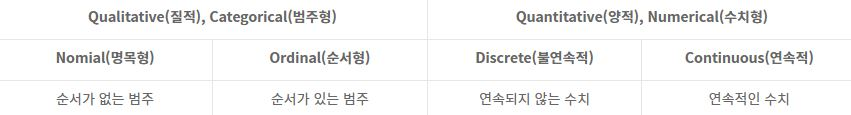

<!-- # 범주형 : Survived, Sex, and Embarked. Ordinal: Pclass.
# 연속형 : Age, Fare. Discrete: Sibsp, Parch.

# Survived : 0=사망, 1=생존
# Pclass : 1=1등석, 2=2등석, 3=3등석
# Sex : male=남성, female=여성
# Age : 나이
# Sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
# Parch : 타이타닉 호에 동승한 부모 / 자식의 수
# Ticket : 티켓 번호
# Fare : 승객 요금
# Cabin : 방 호수
# Embarked : 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴 -->

In [7]:
# 데이터 열(column) 확인하기
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<!-- # 범주형 : Survived, Sex, and Embarked. Ordinal: Pclass.
# 연속형 : Age, Fare. Discrete: Sibsp, Parch.

# Survived : 0=사망, 1=생존
# Pclass : 1=1등석, 2=2등석, 3=3등석
# Sex : male=남성, female=여성
# Age : 나이
# Sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
# Parch : 타이타닉 호에 동승한 부모 / 자식의 수
# Ticket : 티켓 번호
# Fare : 승객 요금
# Cabin : 방 호수
# Embarked : 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴 -->

In [8]:
# 데이터 중에 맨 앞에 5개 행(row) 확인하기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 데이터 중에 맨 뒤에 5개 행(row) 확인하기
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# 데이터 정보 확인하기
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**Feature 설명**

* Categorical(범주형)
  Nomial(명목형) ex) 남자 = 1, 여자 = 0
   - Survived, Sex, Embarked
  Ordinal(순서형) ex) 좋음 = 3, 보통 = 2, 나쁨 = 1
   - Pclass

* Numerical(수치형)
  Discrete(불연속적) ex) - 1,2,3(정수)만 됨 1.1, 2.2, 3.3는 안 됨
   - Sibsp, Parch
  Continuous(연속적) ex) - 1,2,3이랑 1.1, 2,22222, 3.33333333 다 됨
   - Age, Fare
   
Survived : 0=사망, 1=생존  
Pclass : 1=1등석, 2=2등석, 3=3등석  
Sex : male=남성, female=여성  
Age : 나이  
Sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수  
Parch : 타이타닉 호에 동승한 부모 / 자식의 수  
Ticket : 티켓 번호  
Fare : 승객 요금  
Cabin : 방 호수  
Embarked : 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴


In [11]:
# 데이터 분포 확인하기
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# 'O'는 Object를 의미
# include 생략하면 include='number'가 기본값
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
# 객실 등급별 생존률
# as_index = False -> 인덱스 열(column)이 생김
# ascending = False -> 내림차순
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
# 성별별 생존률
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# SibSp(동승한 자매 / 배우자의 수)별 생존률
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
# Parch(동승한 부모 / 자식의 수)별 생존률
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


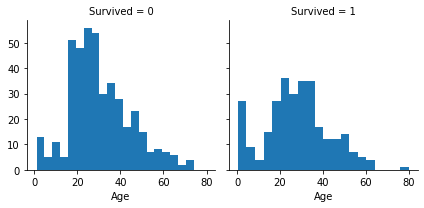

In [17]:
# 연령별 생존 유무 시각화
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


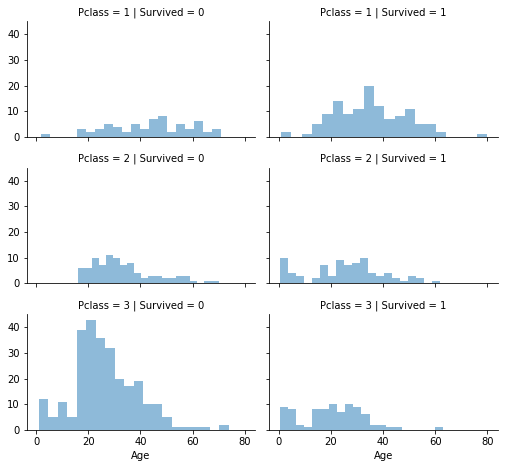

In [18]:
# 객실 등급별 생존 유무 시각화
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2,
aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


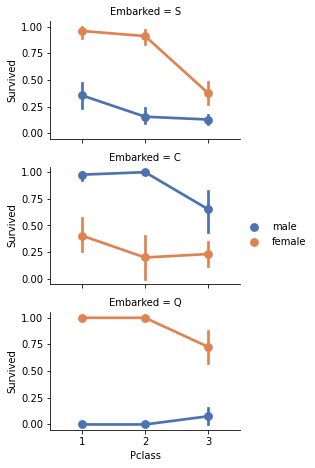

In [19]:
# 승선지별 남녀 생존 유무 시각화
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


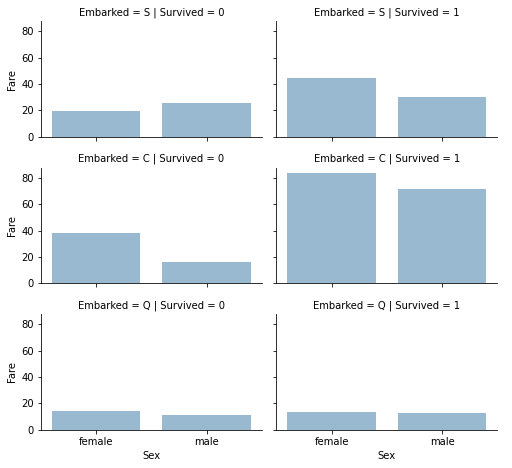

In [20]:
# 승선지별 생존 유무에 따른 요금
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [21]:
# Ticket, Cabin 열(column) 삭제하기

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [22]:
# 기존 기능에서 추출한 새 기능 만들기
# Name 특성에서 Title(Mr, Ms 등등)만 추출해 생존 간의 상관 관계 확인하기
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
# 희귀한 Title은 Rare로 묶기
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [24]:
# 문자였던 Title을 숫자로 바꾸기
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [25]:
# Name 열(column) 삭제하기
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [26]:
# Sex 열(column) 숫자로 바꾸기
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**숫자 연속 피쳐 완료**

이제 결측값 또는 늘값을 가진 기능의 추정과 완성을 시작해야 합니다.먼저 Age 기능에 대해 설명하겠습니다.

수치 연속 피쳐를 완성하기 위해 세 가지 방법을 고려할 수 있습니다.

1. 간단한 방법은 평균과 표준 편차 사이에 난수를 생성하는 것입니다.

2. 결측값을 추측하는 보다 정확한 방법은 연관된 다른 피쳐를 사용하는 것입니다.이 경우 연령, 성별 및 Pclass 간의 상관관계에 주목합니다.P클래스 및 성별 피쳐 조합 집합의 연령에 대한 중위수 값을 사용하여 연령 값을 추측합니다.따라서 Pclass=1과 성별=0, Pclass=1과 성별=1 등의 중위수입니다.

3. 메서드 1과 2를 조합합니다.따라서 중위수를 기준으로 나이 값을 추측하는 대신 P클래스 및 성별 조합 집합을 기준으로 평균과 표준 편차 사이에 난수를 사용하십시오.

방법 1과 방법 3은 랜덤 노이즈를 모델에 도입합니다.여러 실행의 결과는 다를 수 있습니다.우리는 방법 2를 선호한다.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


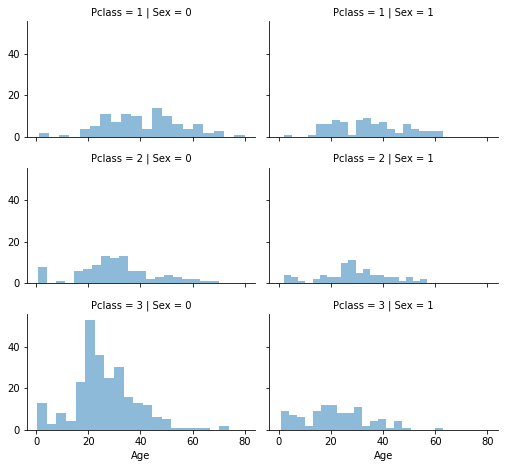

In [27]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [28]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
for dataset in combine:
  for i in range(0, 2):
    for j in range(0, 3):
      guess_df = dataset[(dataset['Sex'] == i) & \
      (dataset['Pclass'] == j+1)]['Age'].dropna()

      age_guess = guess_df.median()

      guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

  for i in range(0, 2):
    for j in range(0, 3):
      dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                  'Age'] = guess_ages[i,j]

  dataset['Age'] = dataset['Age'].astype(int)

train_df.head()   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [32]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
# Age를 이름만 유지하고 내용물은 AgeBand로 사용하기
for dataset in combine:
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[dataset['Age'] > 64,'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [34]:
# AgeBand 삭제
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [35]:
# Parch와 SibSp 합쳐서 FamilySize 만들기
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',  ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
for dataset in combine:
  dataset['IsAlone'] = 0 
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
# IsAlone을 위해 Parch, SibSp, FamilySize 삭제
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [38]:
# Pclass와 Age를 조합해 Age*Class 만들기
for dataset in combine:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [39]:
# Embarked의 Null 값은 'S'로 채움
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [40]:
# Null 값을 채우고 나서 승선항별 생존률
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [41]:
# Embarked 수치형으로 바꾸기
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [42]:
# Fare의 Null 값을 중앙값?(뇌피셜) 
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [43]:
# Fare를 이름만 유지하고 내용은 FareBand 사용하기
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
# Fare를 이름만 유지하고 내용은 FareBand 사용하기
for dataset in combine:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [45]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


모델링, 예측 및 해결  
이제 모델을 교육하고 필요한 솔루션을 예측할 준비가 되었습니다.60개 이상의 예측 모델링 알고리즘 중에서 선택할 수 있습니다.문제의 유형과 솔루션 요건을 파악하여 평가할 수 있는 몇 가지 모델로 좁혀야 합니다.우리의 문제는 분류와 회귀 문제이다.출력(생존 여부)과 다른 변수 또는 특징(성별, 연령, 좌현...) 사이의 관계를 확인하려고 합니다.또한 주어진 데이터 세트로 모델을 교육할 때 감독 학습이라는 기계 학습 범주도 도입하고 있습니다.이 두 가지 기준, 즉 지도 학습과 분류 및 회귀를 통해 모델 선택을 몇 개로 좁힐 수 있습니다.여기에는 다음이 포함됩니다.

- 로지스틱 회귀 분석
- KNN 또는 k-근접 네이버
- 서포트 벡터 머신
- Naigive Bayes 분류자
- Decision Tree(결정 트리)
- 랜덤 포레스트
- 퍼셉트론
- 인공신경망
- RVM 또는 관련 벡터 머신

In [46]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

로지스틱 회귀 분석(Rogistic Regression)은 워크플로우의 초기에 실행하는 데 유용한 모형입니다.로지스틱 회귀 분석에서는 누적 로지스틱 분포인 로지스틱 함수를 사용하여 확률을 추정하여 범주형 종속 변수(기능)와 하나 이상의 독립 변수(기능) 사이의 관계를 측정합니다.

교육 데이터 세트를 기반으로 모델에 의해 생성된 신뢰도 점수를 기록하십시오.

In [47]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

로지스틱 회귀 분석을 사용하여 피쳐 작성 및 목표 달성을 위한 가정과 결정을 검증할 수 있습니다.이는 의사결정 함수의 피쳐 계수를 계산하여 수행할 수 있습니다.

양의 계수는 반응의 로그 오드를 증가시키고(따라서 확률을 증가), 음의 계수는 반응의 로그 오드를 감소시킵니다(따라서 확률을 감소시킵니다).

- 성별은 가장 높은 포지티브 계수이며, 이는 성별 값이 증가할 때(남성: 0에서 여성: 1) 생존=1의 확률이 가장 많이 증가함을 의미한다.
- 반대로 P 클래스가 증가할수록 생존=1 확률은 가장 많이 감소합니다.
- 이러한 방식으로 Age*Class는 Survived와 두 번째로 음의 상관 관계가 높기 때문에 모형화하기에 좋은 인공 기능입니다.
- 두 번째로 높은 양의 상관관계로서의 타이틀도 마찬가지입니다.

In [48]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


다음으로 분류 및 회귀 분석에 사용되는 데이터를 분석하는 관련 학습 알고리즘이 있는 감독 학습 모델인 Support Vector Machine을 사용하여 모델을 만든다.각각 두 범주 중 하나 또는 다른 범주에 속하는 것으로 표시된 일련의 훈련 샘플이 주어지면, SVM 훈련 알고리즘은 새로운 테스트 샘플을 하나 또는 다른 범주에 할당하는 모델을 구축하여 비확률적 이진 선형 분류기가 된다.Wikipedia 참조.

모형은 로지스틱 회귀 모형보다 높은 신뢰 점수를 생성합니다.

In [49]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

패턴 인식에서 k-Nearest Neighbors 알고리즘(또는 줄여서 k-NN)은 분류 및 회귀에 사용되는 비모수 방법입니다.샘플은 네이버 다수결로 분류되며 샘플은 k개의 가장 가까운 네이버 중 가장 일반적인 클래스에 할당됩니다(k는 양의 정수이며 일반적으로 작습니다).k = 1일 경우 오브젝트는 단순히 가장 가까운 단일 네이버 클래스에 할당됩니다.Wikipedia 참조.

KNN 신뢰도 점수는 로지스틱스 회귀보다 우수하지만 SVM보다는 나쁨.

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

기계 학습에서, 순진한 베이즈 분류기는 특징들 사이의 강한 (순진한) 독립성 가정과 함께 베이즈의 정리를 적용하는 것에 기초한 단순한 확률론적 분류기의 집합이다.Naigive Bayes 분류자는 확장성이 뛰어나며 학습 문제에서 변수(피처)의 수에 선형으로 많은 매개 변수가 필요합니다.Wikipedia 참조.

모델 생성 신뢰 점수는 지금까지 평가된 모델 중 가장 낮습니다.

In [51]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

퍼셉트론은 이진 분류기(숫자의 벡터로 표현되는 입력이 특정 클래스에 속하는지 여부를 결정할 수 있는 함수)의 감독 학습을 위한 알고리즘입니다.이것은 선형 분류기의 한 종류이다. 즉, 가중치 집합을 특징 벡터와 결합하는 선형 예측 함수를 기반으로 예측을 하는 분류 알고리즘이다.이 알고리즘은 트레이닝 세트의 요소를 한 번에 하나씩 처리한다는 점에서 온라인 학습을 허용합니다.Wikipedia 참조.

In [52]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [54]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.12

In [55]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.05

In [56]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [57]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,72.05
